#Kelompok 1
Notebook ini dibuat untuk memenuhi tugas akhir Ujian Akhir Semester Genap Mata Kuliah Pembelajaran Mesin

---
Anggota kelompok 1:
1.   Halim Wildhan Awalurrahman - 081911633012
2.   Ibrahim Hafizhan Witsqa - 081911633052



**Justifikasi masalah**: Dalam kasus yang dibahas, akan dilakukan pembelian 15 komponen komputer dan aksesorisnya di 12 toko, terdiri atas 6 toko online dan 6 toko offline. Untuk setiap barang yang dibeli di toko online, pembeli akan dikenakan ongkos kirim sesuai yang telah ditentukan oleh toko yang bersangkutan. Lalu, terdapat biaya transportasi untuk mengunjungi suatu toko offline dari lokasi awal atau toko offline lain, dan kembali ke toko awal dari suatu toko offline. Berdasarkan permasalahan yang ada, banyak kemungkinan lokasi pembelian masing-masing komponen beserta rutenya ada setidaknya 1015 kemungkinan. Jika metode complete search digunakan untuk mencari solusi optimal, tentunya akan membutuhkan waktu yang sangat lama. Sehingga, metode algoritma genetika digunakan untuk menentukan solusi yang diharapkan bisa mendekati optimal, atau bahkan menjadi solusi optimal.


**Daftar Pustaka**: Kholik, Abdul, et al. "Sistem Rekomendasi Berbasis Genetic Algorithm: Studi Kasus Pembelian Komponen Komputer dan Aksesorisnya." *Seminar Nasional Aplikasi Teknologi Informasi (SNATI)*. 2018.


*Code constructed by: Halim* | *Notebook arranged by: Hafizh*

#Execution

##Importing library and data

In [ ]:
!pip install geneticalgorithm2
!git clone https://github.com/hafizzzh/projet-uasml-kelompok1.git

#import library
from itertools import permutations
import numpy as np
from numpy.lib.arraysetops import unique
import pandas as pd
from geneticalgorithm2 import geneticalgorithm2 as ga

#read data
data=pd.read_excel('/content/projet-uasml-kelompok1/1_DataMentah.xlsx', sheet_name='Harga', header=None).iloc[1:16,1:13]
data.fillna(100000, inplace=True)
biaya_offline = pd.read_excel('/content/projet-uasml-kelompok1/1_DataMentah.xlsx', sheet_name='BiayaOffline', header=None).iloc[1:8,1:8]
biaya_online = pd.read_excel('/content/projet-uasml-kelompok1/1_DataMentah.xlsx', sheet_name='BiayaOnline', header=None).iloc[1:16,1:7]

#display data
print("\nData Harga Komponen Komputer")
display(data)
print("\nData Biaya Ongkos Transportasi Toko Offline")
display(biaya_offline)
print("\nData Biaya Ongkos Kirim Toko Online")
display(biaya_online)

     |████████████████████████████████| 51kB 4.0MB/s 
  Created wheel for func-timeout: filename=func_timeout-4.3.5-cp37-none-any.whl size=15097 sha256=22bc620c3771e3eb3c54cd4cfdc1154ed2451cefdca1d0a63f170658ae6eaada
  Stored in directory: /root/.cache/pip/wheels/46/7c/4f/24f1d2d5bbff92219debe7ea19af84f76ddeb90dd4ec544f26
Successfully built func-timeout
Cloning into 'projet-uasml-kelompok1'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.

Data Harga Komponen Komputer


,1,2,3,4,5,6,7,8,9,10,11,12
1,660,555,817.4,1064.0,1248,100000,1040,100000,100000,745,680,585
2,1345,1395,1315.0,1345.0,1399,1420,1470,1280,1450,100000,1400,1370
3,1435,1550,100000.0,100000.0,976,1170,100000,100000,100000,100000,100000,100000
4,5100,5295,100000.0,100000.0,5099,5035,4515,100000,4575,100000,5250,5065
5,2250,3611,100000.0,3430.0,2953,2535,855,5520,100000,100000,100000,2475
6,350,604,400.0,396.0,115,100000,100000,100000,100000,100000,100000,100000
7,590,639,600.0,604.0,625,695,100000,600,650,100000,650,625
8,1259,1099,100000.0,1355.0,1148,100000,995,100000,100000,1080,1100,1450
9,930,1150,1310.5,929.0,965,880,100000,100000,100000,100000,100000,995
10,800,923,1169.0,1168.7,1370,1000,100000,100000,100000,100000,100000,975



Data Biaya Ongkos Transportasi Toko Offline


,1,2,3,4,5,6,7
1,0,9,9.5,9.5,9,9.5,18
2,9,0,9.5,9,12.5,14.5,23.5
3,9.5,9.5,0,12.5,11,14.5,23
4,9.5,9,12.5,0,14,12.5,18
5,9,12.5,11,14,0,10,23.5
6,9.5,14.5,14.5,12.5,10,0,11.5
7,18,23.5,23,18,23.5,11.5,0



Data Biaya Ongkos Kirim Toko Online


,1,2,3,4,5,6
1,27,0,21,18,29,0
2,21,0,21,0,18,0
3,21,0,0,0,18,0
4,21,0,0,0,18,0
5,42,0,0,54,0,0
6,252,0,210,252,12,0
7,42,72,63,33,18,0
8,147,54,0,0,18,0
9,21,0,21,1,18,0
10,42,18,63,33,18,0


##Building Genetic Algoithm


Constructing function

In [ ]:
def f(X):
    toko = []
    ongkir = 0
    rute = []
    total = 0

    #count fitness value (price, transport, delivery)
    for i in range(0,15):
        #price for each component
        awal = data.loc[i+1, X[i]]
        total = total+awal

        #decide online/offline store
        if X[i] <=6 :
            kir = biaya_online.loc[i+1, X[i]]
            ongkir = kir+ongkir #online delivery price
        else:
            toko.append(X[i])
    
    #count transport price
    duit = 0
    bensin = []
    toko = unique(toko)
    rute = np.array(list(permutations(toko)))
    for i in rute:
        j = 0
        awal = biaya_offline.loc[1, i[j]-5]
        while j < len(i)-1:
            duit = awal+biaya_offline.loc[i[j]-5, i[j+1]-5]
            awal = duit
            j = j+1
        akhir = biaya_offline.loc[i[j]-5, 1]
        duit = awal+akhir
        bensin.append(duit)
    toko = []

    #fitness value
    result = total+ongkir+duit

    return result

Defining variable boundaries 

In [ ]:
#define variable bound (numbers of store)
varbound=np.array([[1,12]]*15)
online_store=['Tokopedia', 'Lazada', 'Bukalapak', 'Shoopee', 'Blibli', 'Bhinneka']
offline_store=['Els', 'Computa', 'Quadra', 'Maxi', 'Anandam', 'Absolute']
barang=['HDD', 'SSD', 'RAM', 'Processor', 'Motherboard', 'Casing', 'Power Supply', 'Monitor', 'Mouse', 'Keyboard', 'Headphone', 'Speaker', 'VGA', 'UPS', 'DVD ROM']
store_location=['online', 'offline']

Setting up algorithm parameters

In [ ]:
#algorithm parameters
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':10,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.4,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

Generating model


|||||||||||||||||||||||||||||||||||||||||||||||||| 100.0% GA is running...500 gen from 500

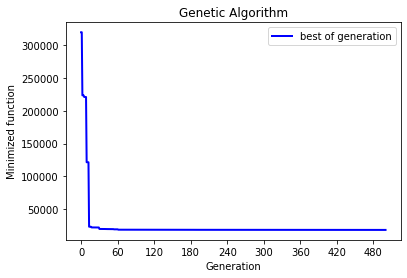

In [ ]:
#genetic algorithm model construction
model=ga(function=f, dimension=15, variable_type='int', variable_boundaries=varbound, algorithm_parameters=algorithm_param)

#genetic algorith model execution
model.run(disable_printing=True)

#Result and Conclusion

In [ ]:
def translate(hasil_model):
    print()
    x = model.output_dict['variable'].astype(int)
    biaya_belanja = model.output_dict['function'].astype(int)
    print('=================================================')
    print('REKOMENDASI BELANJA KOMPONEN PC')
    print('=================================================')
    toko = []
    rute = []
    harga_barang = 0
    ongkir = 0
    
    for i in range(15):
        harga = data.loc[i+1, x[i]]*1000
        currency = "Rp. {:,.2f}".format(harga)
        if x[i] < 7:
            kir = biaya_online.loc[i+1, x[i]]
            ongkir = kir+ongkir #online delivery price
            print(str(i+1)+'.', barang[i], 'dibeli secara online di', online_store[x[i]-1], 'seharga', currency)
        else:
            print(str(i+1)+'.', barang[i], 'dibeli secara offline di', offline_store[x[i]-7], 'seharga', currency)
            toko.append(x[i])
        harga_barang = harga_barang+harga

    #count transport price
    df = pd.DataFrame(columns =  ["A", "B"])
    duit = 0
    bensin = []
    toko = unique(toko)
    rute = np.array(list(permutations(toko)))
    for i in rute:
        j = 0
        awal = biaya_offline.loc[1, i[j]-5]
        while j < len(i)-1:
            duit = awal+biaya_offline.loc[i[j]-5, i[j+1]-5]
            awal = duit
            j = j+1
        akhir = biaya_offline.loc[i[j]-5, 1]
        duit = awal+akhir         
        bensin.append(duit)
    df['A'] = pd.Series(bensin)
    df['B'] = rute.tolist()
    df = df.sort_values('A').reset_index(drop=True)
    toko_dipilih = df.loc[0, 'B']
    toko = []
    print()
    print('Kesimpulan:')
    print('Total biaya belanja komponen', "Rp. {:,.2f}".format(harga_barang*1000))
    print('Ongkos kirim belanja online', "Rp. {:,.2f}".format(ongkir*1000))
    print('Biaya transportasi belanja offline', "Rp. {:,.2f}".format(min(bensin)*1000))
    print('dengan rute' ,end=' ')
    for i in range(len(toko_dipilih)):
        if i == len(toko_dipilih)-1:
            print('lalu ', offline_store[toko_dipilih[i]-7]+'.')
        else:
            print(offline_store[toko_dipilih[i]-7], end=', ')
    print('Total biaya keseluruhan', "Rp. {:,.2f}".format(biaya_belanja*1000))
    print()

##Result

In [ ]:
#meaning for iteration
convergence=model.report
print()
print('=================================================')
print('HASIL GENETIC ALGORITHM')
print('=================================================')
print('Jumlah iterasi', algorithm_param['max_num_iteration'])
print('Harga terbaik', "Rp. {:,.2f}".format(model.output_dict['function']*1000))
print('Kromosom terbaik', model.output_dict['variable'].astype(int))
print('Rata-rata harga dari iterasi', "Rp. {:,.2f}".format(np.mean(convergence)*1000))


HASIL GENETIC ALGORITHM
Jumlah iterasi 500
Harga terbaik Rp. 18,244,000.00
Kromosom terbaik [2 8 5 7 7 5 8 7 4 1 2 7 5 5 1]
Rata-rata harga dari iterasi Rp. 23,443,277.64


##Conclusion

In [ ]:
#deliver the meaningful information
hasil = model.output_dict
translate(hasil)


REKOMENDASI BELANJA KOMPONEN PC
1. HDD dibeli secara online di Lazada seharga Rp. 555,000.00
2. SSD dibeli secara offline di Computa seharga Rp. 1,280,000.00
3. RAM dibeli secara online di Blibli seharga Rp. 976,000.00
4. Processor dibeli secara offline di Els seharga Rp. 4,515,000.00
5. Motherboard dibeli secara offline di Els seharga Rp. 855,000.00
6. Casing dibeli secara online di Blibli seharga Rp. 115,000.00
7. Power Supply dibeli secara offline di Computa seharga Rp. 600,000.00
8. Monitor dibeli secara offline di Els seharga Rp. 995,000.00
9. Mouse dibeli secara online di Shoopee seharga Rp. 929,000.00
10. Keyboard dibeli secara online di Tokopedia seharga Rp. 800,000.00
11. Headphone dibeli secara online di Lazada seharga Rp. 1,675,000.00
12. Speaker dibeli secara offline di Els seharga Rp. 515,000.00
13. VGA dibeli secara online di Blibli seharga Rp. 3,644,000.00
14. UPS dibeli secara online di Blibli seharga Rp. 575,000.00
15. DVD ROM dibeli secara online di Tokopedia seharga